In [1]:
import spectral.io.envi as envi
import numpy as np


def read_qub_file(header_file,qub_file):
   
    img = envi.open(header_file,qub_file)
    
   
    data = img.load()
    
    return data


qub_file = 'ch2_iir_nci_20240213T0543269734_d_img_d18\data\calibrated\\20240213\ch2_iir_nci_20240213T0543269734_d_img_d18.qub'
header_file = 'ch2_iir_nci_20240213T0543269734_d_img_d18\data\calibrated\\20240213\ch2_iir_nci_20240213T0543269734_d_img_d18.hdr'


samples = 250
lines = 14563
bands = 256
offset = 0
dtype = np.float32
interleave = 'bsq'
byte_order = 0


data = read_qub_file(header_file ,qub_file)

print(data.shape)

(14563, 250, 256)


In [2]:
from matplotlib import pyplot as plt
import pandas as pd

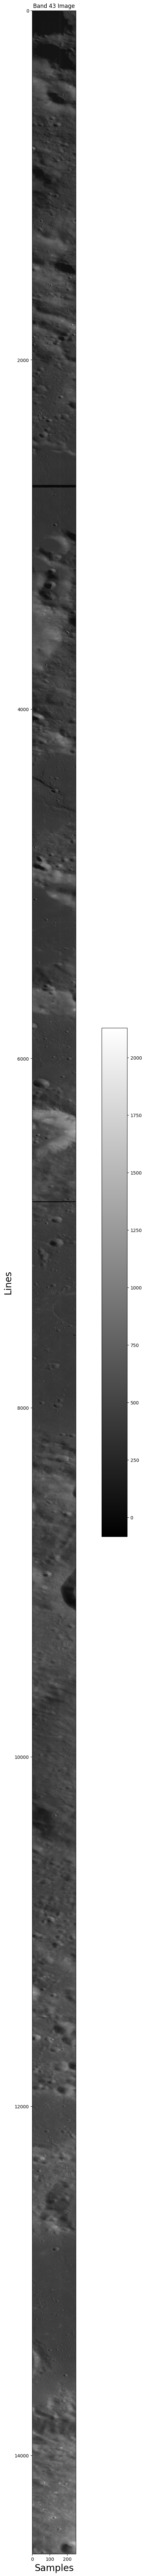

In [3]:

band_index = 42
selected_band = data[:, :, band_index]


fig, ax = plt.subplots(figsize=(20, 100))


im = ax.imshow(selected_band, cmap='gray',)


cbar = plt.colorbar(im, ax=ax, shrink=0.2)
cbar.ax.tick_params(labelsize=10)


ax.set_title(f'Band {band_index + 1} Image', fontsize=12)
ax.set_xlabel('Samples', fontsize=20)
ax.set_ylabel('Lines', fontsize=20)


plt.show()

In [4]:
point = (9000,140)
value_at = data[point[0],point[1],:]
value_at = value_at.reshape((256))


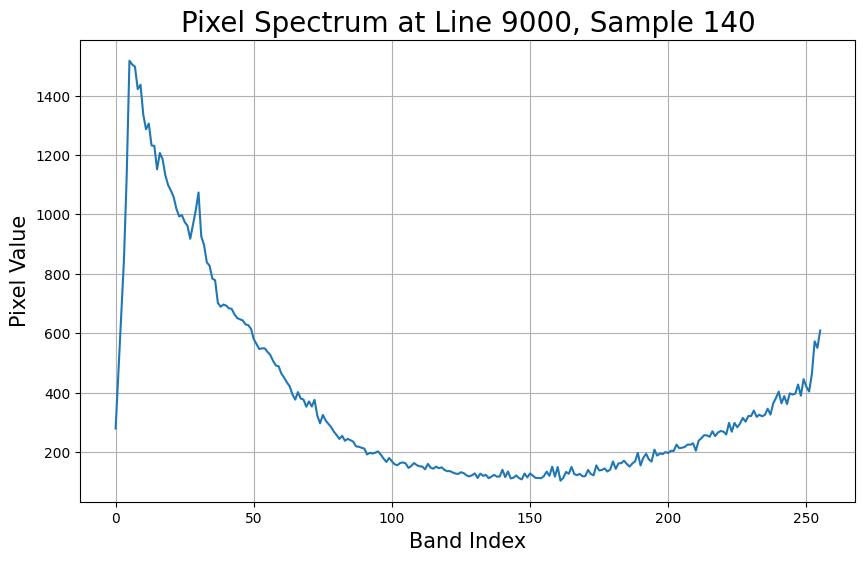

In [5]:



fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(range(256), value_at)


ax.set_title(f'Pixel Spectrum at Line {point[0]}, Sample {point[1]}', fontsize=20)
ax.set_xlabel('Band Index', fontsize=15)
ax.set_ylabel('Pixel Value', fontsize=15)


plt.grid(True)
plt.show()

In [6]:
def parse_oat_file(filepath):
    data = []
    with open(filepath, 'r') as file:
        for line in file:
            record = {
                "Record Type": line[0:8].strip(),
                "Physical Record Number": int(line[8:14].strip()),
                "Block Length": int(line[14:18].strip()),
                "Time UTC": line[18:46].strip(),
                "Lunar Position X": float(line[46:66].strip()),
                "Lunar Position Y": float(line[66:86].strip()),
                "Lunar Position Z": float(line[86:106].strip()),
                "Satellite Position X": float(line[106:126].strip()),
                "Satellite Position Y": float(line[126:146].strip()),
                "Satellite Position Z": float(line[146:166].strip()),
                "Satellite Velocity X": float(line[166:178].strip()),
                "Satellite Velocity Y": float(line[178:190].strip()),
                "Satellite Velocity Z": float(line[190:202].strip()),
                "S/C Attitude Q1": float(line[202:216].strip()),
                "S/C Attitude Q2": float(line[216:230].strip()),
                "S/C Attitude Q3": float(line[230:244].strip()),
                "S/C Attitude Q4": float(line[244:258].strip()),
                "Transformation Quaternion Earth Q1": float(line[258:272].strip()),
                "Transformation Quaternion Earth Q2": float(line[272:286].strip()),
                "Transformation Quaternion Earth Q3": float(line[286:300].strip()),
                "Transformation Quaternion Earth Q4": float(line[300:314].strip()),
                "Transformation Quaternion Lunar Q1": float(line[314:328].strip()),
                "Transformation Quaternion Lunar Q2": float(line[328:342].strip()),
                "Transformation Quaternion Lunar Q3": float(line[342:356].strip()),
                "Transformation Quaternion Lunar Q4": float(line[356:370].strip()),
                "Latitude Sub-Satellite": float(line[370:384].strip()),
                "Longitude Sub-Satellite": float(line[384:398].strip()),
                "Solar Azimuth": float(line[398:412].strip()),
                "Solar Elevation": float(line[412:426].strip()),
                "Latitude": float(line[426:440].strip()),
                "Longitude": float(line[440:454].strip()),
                "Satellite Altitude": float(line[454:466].strip()),
                "Angle Roll Velocity Vector": float(line[466:478].strip()),
                "Eclipse Status": int(line[478:479].strip()),
                "Emission Angle": float(line[479:488].strip()),
                "Sun Angle Yaw": float(line[488:497].strip()),
                "Angle Yaw Nadir": float(line[497:506].strip()),
                "Slant Range": float(line[506:516].strip()),
                "Orbit Number": int(line[516:521].strip()),
                "Solar Zenith Angle": float(line[521:530].strip()),
                "Angle FoV Velocity": float(line[530:539].strip()),
                "X Yaw Angle": float(line[539:555].strip()),
                "Y Roll Angle": float(line[555:571].strip()),
                "Z Pitch Angle": float(line[571:587].strip()),
                "Spare": line[587:628].strip()
            }
            data.append(record)
    return data


oat_data =  parse_oat_file("ch2_iir_nci_20240213T0543269734_d_img_d18\miscellaneous\calibrated\\20240213\ch2_iir_nci_20240213T0543269734_d_img_d18.oat")

oat_data[0]

{'Record Type': 'ORBTATTD',
 'Physical Record Number': 1,
 'Block Length': 628,
 'Time UTC': '2024   2  13   5  43  24 760',
 'Lunar Position X': 358149.351844,
 'Lunar Position Y': 57660.24941,
 'Lunar Position Z': 20748.676122,
 'Satellite Position X': 32.672233,
 'Satellite Position Y': 105.233199,
 'Satellite Position Z': -1802.155901,
 'Satellite Velocity X': 0.046591,
 'Satellite Velocity Y': -1.646551,
 'Satellite Velocity Z': -0.083541,
 'S/C Attitude Q1': -0.6999054843,
 'S/C Attitude Q2': 0.0111803604,
 'S/C Attitude Q3': -0.7134847456,
 'S/C Attitude Q4': 0.0307706098,
 'Transformation Quaternion Earth Q1': -0.0010686445,
 'Transformation Quaternion Earth Q2': 0.000481877,
 'Transformation Quaternion Earth Q3': -0.9127113246,
 'Transformation Quaternion Earth Q4': 0.4086033085,
 'Transformation Quaternion Lunar Q1': 0.0130089327,
 'Transformation Quaternion Lunar Q2': 0.1902938144,
 'Transformation Quaternion Lunar Q3': -0.9805744571,
 'Transformation Quaternion Lunar Q4': 0

In [10]:
band_data = pd.read_excel("Band_with_SSI_Information.xlsx")
cos_i = oat_data[0]["Solar Zenith Angle"]
radiance = value_at
wavelenght = band_data['Center Wavelength (nm)']
solar_irradiance = band_data['SSI']

reflectance = radiance / ((solar_irradiance / np.pi) * cos_i)


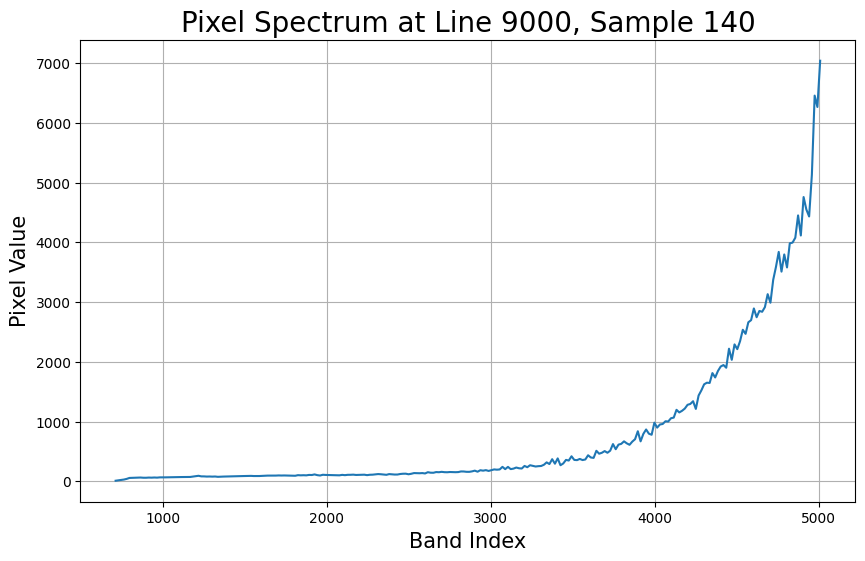

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(wavelenght, reflectance)


ax.set_title(f'Pixel Spectrum at Line {point[0]}, Sample {point[1]}', fontsize=20)
ax.set_xlabel('Band Index', fontsize=15)
ax.set_ylabel('Pixel Value', fontsize=15)


plt.grid(True)
plt.show()